<h1 style="font-size:260%;"><center> 😷 Covid Brazil  👩‍🔬</center></h1>
<div style="text-align: right"><i> Student: Gabriela Oliveira da Trindade </i></div>
<br>

# Introduction
---
This notebook is a brief analysis of a **Covid-19 dataset from Brazil**, which you can find on [Brasil.io](https://brasil.io/dataset/covid19/caso/). It's a project proposed by **[Alura Bootcamp](https://www.alura.com.br/bootcamp/data-science-aplicada/matriculas-abertas) Module1**. Here I'll use **Pandas** and **Matplotlib** libraries to analyze the data. 

The dataset was gotten from [Alura Github](https://github.com/alura-cursos/agendamento-hospitalar/blob/main/dados/COVID19-BRASILIO-06-11-2020.csv.gz), and its **snapshot was on 2020/05/11**. For the most recent dataset, you can easily download it on the [Brasil.io](https://brasil.io/dataset/covid19/caso/) website in a CSV format.

## Goals 🎯
---
My goal is to analyze the Southeast and Northeast regions of Brazil, the information from their capitals and states as a whole. I'll not cross this dataset with another one. The insights gotten here are only from the Brazil.io dataset.

## Summary
---
- The two first steps are to import libraries that I'll use and then load the dataset into a dataframe.
- After that, an initial exploratory data analysis is made. The goal here is to understand the data and check its quality. Some investigation is done to understand each column and what it represents, as well as checking whether the feature values make sense. Many insights from the data are obtained in this section.
- Data cleaning is the next step. After verifying the quality of the data, I'll clear incorrect values and fill the missing ones.
- With all data clean it's time to create new features from the existing ones that can help in the final analysis, and select the relevant ones.
- Thus, it's time for the final analysis.

## Conclusions
---
- São Paulo is the state with the highest cumulative number of cases, when compared to states from Northeast and Southeast regions.
- Rio de Janeiro is the fourth state with the highest cummulative number of cases, when compared to states from Northeast and Southeast regions.
- The second state with the highest cumulative number of cases is Minas Gerais, with a small difference with the third state which is Bahia.
- The first capital with the highest confirmed cases per 100k inhabitants is Aracaju.
- Most of the time São Paulo capital led the highest number of cases per day in Southeast. However in some days, Rio de Janeiro and Belo Horizonte made this number higher.
- Maceió was the first capital to have a confirmed case in the Northeast.
- The highest death rate mean is in the Southeast region.
- Northeast is the region with the highest average accumulated number of confirmed cases per 100k inhabitants.
- In Southeast the period of the highest number of cases was in August. On the other hand, the period of the highest number of cases in Northeast was in July.

<h1 style="font-size:220%;"><center> Table of Contents </center></h1>

0. [The notebook](#0.-The-notebook-📝)
1. [Importing libraries](#1.-Importing-Libraries)
2. [Getting the dataset](#2.-Getting-the-dataset)
3. [Initial Exploratory Data Analysis](#3.-Initial-Exploratory-Data-Analysis)
4. [Data Cleaning](#4.-Data-Cleaning)
5. [Feature Engineering](#5.-Feature-Engineering) <br>
    5.1 [Creating new features](#5.1-Creating-new-features) <br>
    5.2 [Feature Selection](#5.2-Feature-Selection) <br>
6. [Hypothesis](#6.-Hypothesis)
7. [Analysis](#7.-Final-Analysis)

# 0. The notebook 📝
---

This is a Jupyter Notebook. Here you'll find Python code snippets as well as texts that allows the reader understading some conclusions and insights I got.

So, here, you'll see different boxes with different purposes:
<br>
<br>

<div id="demobox" style="background-color: #e0e0d1; padding: 10px;">
    This is a demo box to illustrate the <b>introduction box</b>. It can be find in the beginning of some sections, talking about the section goal.
</div>

<br>
<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    This is a demo box to illustrate the <b>decision box</b>. It's a box to highlight some decision made about data transformation and filtering. In this box you can also find an explanation about the decision.
</div>

<br>
<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    This is a demo box to illustrate the <b>insight box</b>. It can be find after get some insight from the dataset.
</div>

<br>
<div id="demobox" style="background-color: #ffcccc ; padding: 10px;">
    This is a demo box to illustrate the <b>hypothesis box</b>. In this box you will find some hypothesis.
</div>

<br>
<div id="demobox" style="background-color: #cfc ; padding: 10px;">
    This is a demo box to illustrate the <b>hypothesis conclusion box</b>. In this box you will find the conclusion on the hypothesis.
</div>
<br>
All these boxes have the intention to make easier to find insights around the notebook. However, you can see some code outputs (results of code cells) with specific information on the dataset, as well as some of my thoughts in plain text.

Note1: the most important information will be on one of the boxes. <br>
Note2: programming decisions will be described in plain text.

Also some comments are provided in the code cells, explaining what that snippet actually do. See below an example.

In [1]:
# Pritting a phrase. (This is a comment in the code cell.)
print("This is an example of code cell. Below, you can see the output that this code generates.")

This is an example of code cell. Below, you can see the output that this code generates.


# 1. Importing Libraries

---
<div id="demobox" style="background-color: #e0e0d1; padding: 10px;">
    All the necessary libraries are imported in this section.
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# 2. Getting the dataset
---
<div id="demobox" style="background-color: #e0e0d1; padding: 10px;">
    Here I'm gonna load the dataset into a dataframe, and then print the first lines to get the first impressions.
</div>

In [3]:
url = 'https://github.com/alura-cursos/agendamento-hospitalar/blob/main/dados/COVID19-BRASILIO-06-11-2020.csv.gz?raw=true'

covid_brazil = pd.read_csv(url, compression='gzip')

covid_brazil.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b>First impressions:</b></h1>
    <br>
    The dataset is organized by date and place (city or state). So each <b>row represents the data for a specific day and place</b>. <br>
    Through the 5 first rows (observations) is possible to see an overview of the columns. All of them are self-explanatory. <br>
    Also it was possible to notice that the <b>numbers are in America's style</b>.
</div>

# 3. Initial Exploratory Data Analysis
---
<div id="demobox" style="background-color: #e0e0d1; padding: 10px;">
    The Initial Exploratory Data Analysis has basically 2 main goals: <br>
    <ul>
        <li><b>Understanding the dataset</b></li>
        <li><b>Checking the Data Quality</b></li>
    </ul>
    To do it, I'm gonna through some features (columns), check their values and data types. Also, I'll use the data dictionary available on Brasil.io to understand the meaning of each column, which has all the columns description and the possible values for them. <br>
    Besides that, I'm gonna looking for the dataset shape, the missing and wrong values. 
    <br>
    <br>
    <b>So here, you'll find general insights of the data and some future decisions for data cleaning<b>.
</div>

In [4]:
covid_brazil.shape

(936870, 13)

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Dataframe shape:</b></h1>
    <br>
    The data has <b>936870 rows and 13 columns</b>.
</div>

In [5]:
covid_brazil.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [6]:
covid_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   city                            930535 non-null  object 
 3   place_type                      936870 non-null  object 
 4   confirmed                       936870 non-null  int64  
 5   deaths                          936870 non-null  int64  
 6   order_for_place                 936870 non-null  int64  
 7   is_last                         936870 non-null  bool   
 8   estimated_population_2019       933215 non-null  float64
 9   estimated_population            933215 non-null  float64
 10  city_ibge_code                  933215 non-null  float64
 11  confirmed_per_100k_inhabitants  919888 non-null  float64
 12  death_rate      

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Data Dictionary:</b></h1>
    <br>
    If you are in doubt about the meaning of the columns or their data types, below you'll find a description for each one: <br>
    <br>
    - <b>date [object datatype]:</b> date of data collection (format: YYYY-MM-DD). <br>
    - <b>state [object datatype]:</b> federative unit abbreviation. <br>
    - <b>city [object datatype]:</b> city name (may be blank when it refers to the state, can be filled in with Imported/Undefined as well). <br>
    - <b>place_type [object datatype]:</b> the place type, it can be city or state. <br>
    - <b>order_for_place [int64 datatype]:</b> it's an integer that identifies the order of registration for that location. If it's the first time that a covid case arose in that place, that it'll be 1 and the next registrations will continuous with the count. <br>
    - <b>is_last [bool datatype]:</b> it identifies if the information is the last one for that place. <br>
    - <b>city_ibge_code [float64 datatype]:</b> place code from IBGE. <br>
    - <b>confirmed [int64 datatype]:</b> number of cases confirmed. <br>
    - <b>deaths [int64 datatype]:</b> number of deaths. <br>
    - <b>estimated_population [float64 datatype]:</b> estimated population for the referent place in 2020 (data from IBGE). <br>
    - <b>estimated_population_2019 [float64 datatype]:</b> estimated population for the referent place in 2019 (data from IBGE). Pay attention: this column can to have outdated values. Maybe it's better use estimated_population column. <br>
    - <b>confirmed_per_100k_inhabitants [float64 datatype]:</b> number of confirmed cases by 100,000 inhabitants (based on estimated_population) --> (confirmed/inhabitants/100,000). <br>
    - <b>death_rate [float64 datatype]:</b> mortality rate (deaths / confirmed).
</div>

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Drop <mark style="background-color: #f2f2f2">estimated_population_2019</mark> column:</b></h1>
    <br>
    As the Data Dictionary mentioned, the <mark style="background-color: #f2f2f2">estimated_population_2019</mark> column can have outdated values, so I decided to not consider this information. In <a href="#5.2-Feature-Selection">Feature Engineering > Feature Selection Section</a> I'll not select it.
</div>

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b>The observations (rows):</b></h1>
    <br>
    We have <b>2 different types of row, some ones represent cities and other ones states</b>. <br>
    Through <mark style="background-color: #f2f2f2">place_type</mark> we can know which type of row is. If it's on state, the city is filled by a NaN value.
</div>

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    I'll split it in two dataframes, one that represents the states and another one that represents the cities.
</div>

In [7]:
covid_brazil.isnull().sum()

date                                  0
state                                 0
city                               6335
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3655
estimated_population               3655
city_ibge_code                     3655
confirmed_per_100k_inhabitants    16982
death_rate                            0
dtype: int64

- As expected, some null values were find in `city` column.
- Are these null values there because the row is representing a state? Let's check...

In [8]:
covid_brazil[covid_brazil.city.isnull()] \
    ['place_type'] \
    .value_counts()

state    6335
Name: place_type, dtype: int64

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Null Values:</b></h1>
    <br>
    As expected, some <b>null values</b> were find in <mark style="background-color: #f2f2f2">city</mark> column (6335 null values), but all them are about that rows which represent state information. <br>
    However, we have more columns with null values, that are: <br>
    - <mark style="background-color: #f2f2f2">estimated_population_2019</mark>: 3655 null values <br>
    - <mark style="background-color: #f2f2f2">estimated_population</mark>: 3655 null values <br>
    - <mark style="background-color: #f2f2f2">city_ibge_code</mark>: 3655 null values <br>
    - <mark style="background-color: #f2f2f2">confirmed_per_100k_inhabitants</mark>: 16982 null values <br>
</div>

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    I will not worry about them now, in the <a href="#4.-Data-Cleaning">Data Cleaning Section</a> I'll come back to these null values.    
</div>

- Now I'm gonna see some statistical information on the dataframe
- I'm gonna work with these values separated by the row type - for those that represent states and the others that represent cities. 
- Why? Because the values of the states are higher!

In [9]:
# split the data
covid_brazil_states = covid_brazil \
                        [covid_brazil.place_type=='state'] \
                        .copy() \
                        .reset_index(drop=True)

covid_brazil_cities = covid_brazil \
                        [covid_brazil.place_type=='city'] \
                        .copy() \
                        .reset_index(drop=True)

In [10]:
columns_to_describe = ['confirmed', 'deaths', 'order_for_place',
                       'estimated_population_2019', 'estimated_population',
                       'confirmed_per_100k_inhabitants', 'death_rate']

covid_brazil_states \
    [columns_to_describe] \
    .describe()

,confirmed,deaths,order_for_place,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate
count,6.335000e+03,6335.000000,6335.000000,6.335000e+03,6.335000e+03,6329.000000,6335.000000
mean,8.244889e+04,2704.278295,117.951223,7.968423e+06,8.029341e+06,1440.885530,0.031743
std,1.317477e+05,5027.110815,67.969657,9.305979e+06,9.372368e+06,1596.233475,0.022277
min,0.000000e+00,0.000000,1.000000,6.057610e+05,6.311810e+05,0.002160,0.000000
25%,3.413000e+03,115.500000,59.000000,2.778986e+06,2.809394e+06,68.430220,0.020400
50%,4.202600e+04,961.000000,118.000000,4.018650e+06,4.064052e+06,1005.725090,0.025700
75%,1.135545e+05,3157.500000,176.000000,9.557071e+06,9.616621e+06,2355.031730,0.037000
max,1.125936e+06,39717.000000,253.000000,4.591905e+07,4.628933e+07,9237.286930,0.222200


In [11]:
covid_brazil_cities \
    [columns_to_describe] \
    .describe()

,confirmed,deaths,order_for_place,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate
count,930535.000000,930535.000000,930535.000000,9.268800e+05,9.268800e+05,913559.00000,930535.000000
mean,509.516628,16.822735,87.287253,4.586862e+04,4.622728e+04,1022.60566,0.035822
std,4061.815428,197.548493,53.226700,2.605863e+05,2.622682e+05,1347.23553,0.094076
min,0.000000,0.000000,1.000000,7.810000e+02,7.760000e+02,0.00811,0.000000
25%,11.000000,0.000000,42.000000,6.117000e+03,6.130000e+03,115.09110,0.000000
50%,57.000000,1.000000,84.000000,1.352100e+04,1.359800e+04,548.85486,0.014300
75%,246.000000,5.000000,128.000000,2.970700e+04,2.986900e+04,1425.31357,0.034800
max,319156.000000,13715.000000,242.000000,1.225202e+07,1.232523e+07,22358.36627,1.000000


- Let's check the `order_for_place` values (the min value)
- Why is it 1 instead of 0? 
- Is that because the register on the dataset happen just when there is covid confirmed case in the place?

In [12]:
covid_brazil[(covid_brazil.confirmed == 0) &
             (covid_brazil.order_for_place == 1)].head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1870,2020-05-18,AC,Jordão,city,0,0,1,False,8317.0,8473.0,1200328.0,NaN,0.0
2036,2020-05-13,AC,Manoel Urbano,city,0,0,1,False,9459.0,9581.0,1200344.0,NaN,0.0
2963,2020-05-13,AC,Porto Walter,city,0,0,1,False,11982.0,12241.0,1200393.0,NaN,0.0
12196,2020-05-28,AM,Envira,city,0,0,1,False,20033.0,20393.0,1301506.0,NaN,0.0
12896,2020-05-28,AM,Ipixuna,city,0,0,1,False,29689.0,30436.0,1301803.0,NaN,0.0


- Hmm... Some places have `confirmed` cases equals 0 and `order_for_place` equals 1.
- Does `order_for_place` start from 1 and changes when the first confirmed case arise?

In [13]:
covid_brazil[covid_brazil.city == 'Jordão'].tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1866,2020-05-23,AC,Jordão,city,0,0,5,False,8317.0,8473.0,1200328.0,NaN,0.0
1867,2020-05-22,AC,Jordão,city,0,0,4,False,8317.0,8473.0,1200328.0,NaN,0.0
1868,2020-05-21,AC,Jordão,city,0,0,3,False,8317.0,8473.0,1200328.0,NaN,0.0
1869,2020-05-19,AC,Jordão,city,0,0,2,False,8317.0,8473.0,1200328.0,NaN,0.0
1870,2020-05-18,AC,Jordão,city,0,0,1,False,8317.0,8473.0,1200328.0,NaN,0.0


In [14]:
covid_brazil[covid_brazil.city == 'Natal'].tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
579080,2020-03-20,RN,Natal,city,5,0,5,False,884122.0,890480.0,2408102.0,0.56149,0.0
579081,2020-03-18,RN,Natal,city,1,0,4,False,884122.0,890480.0,2408102.0,0.11230,0.0
579082,2020-03-16,RN,Natal,city,1,0,3,False,884122.0,890480.0,2408102.0,0.11230,0.0
579083,2020-03-13,RN,Natal,city,1,0,2,False,884122.0,890480.0,2408102.0,0.11230,0.0
579084,2020-03-12,RN,Natal,city,1,0,1,False,884122.0,890480.0,2408102.0,0.11230,0.0


- No. The `order_for_place` columns does not start from 1 and changes just when the first confirmed case arise
- Locations with confirmed cases equal to 0 for the first registration has `order_place_count` greater than 0. Something is wrong here...
- So, is `order_place_count` about the order of registration for state instead of city (as the description suggested)? Let's check it.

In [15]:
covid_brazil[covid_brazil.state == 'AC'].sort_values('date').head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
3186,2020-03-17,AC,Rio Branco,city,3,0,1,False,407319.0,413418.0,1200401.0,0.72566,0.0
233,2020-03-17,AC,NaN,state,3,0,1,False,881935.0,894470.0,12.0,0.33539,0.0
3185,2020-03-18,AC,Rio Branco,city,3,0,2,False,407319.0,413418.0,1200401.0,0.72566,0.0
232,2020-03-18,AC,NaN,state,3,0,2,False,881935.0,894470.0,12.0,0.33539,0.0
3184,2020-03-19,AC,Rio Branco,city,4,0,3,False,407319.0,413418.0,1200401.0,0.96754,0.0


- No, the `order_place_count` is NOT about the order of registration for state. Why?
- The day of the first case in AC state happened on 2020-03-17. But the `order_place_count` for Jordão city in AC starts to count from 2020-05-18 without registers of confirmed case.
- Can we trust in this information (`order_place_count`)?

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b><mark style="background-color: #f2f2f2">order_for_place</mark> column:</b></h1>
    <br>
    The <mark style="background-color: #f2f2f2">order_for_place</mark> minimun value is 1 and it <b>should</b> only start to increment when the place has its first confirmed case. But I noticed that there is an opposite example that it doesn't happen: for "Jordão" city the <mark style="background-color: #f2f2f2">order_for_place</mark> is counting without before having registered the first covid case confirmation.
</div>

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    As I cannot trust on <mark style="background-color: #f2f2f2">order_for_place</mark> because of the insight I got above, I'll clean up this column in the <a href="#4.-Data-Cleaning">Data Cleaning Section</a>.
</div>

- Let's check now a little bit about the max values on `confirmed` and `deaths` columns

In [16]:
covid_brazil_states[['confirmed', 'deaths']].describe()

,confirmed,deaths
count,6.335000e+03,6335.000000
mean,8.244889e+04,2704.278295
std,1.317477e+05,5027.110815
min,0.000000e+00,0.000000
25%,3.413000e+03,115.500000
50%,4.202600e+04,961.000000
75%,1.135545e+05,3157.500000
max,1.125936e+06,39717.000000


In [17]:
covid_brazil_cities[['confirmed', 'deaths']].describe()

,confirmed,deaths
count,930535.000000,930535.000000
mean,509.516628,16.822735
std,4061.815428,197.548493
min,0.000000,0.000000
25%,11.000000,0.000000
50%,57.000000,1.000000
75%,246.000000,5.000000
max,319156.000000,13715.000000


In [18]:
covid_brazil[['confirmed', 'deaths']].describe()

,confirmed,deaths
count,9.368700e+05,936870.000000
mean,1.063581e+03,34.994980
std,1.337273e+04,508.061762
min,0.000000e+00,0.000000
25%,1.100000e+01,0.000000
50%,5.800000e+01,1.000000
75%,2.530000e+02,5.000000
max,1.125936e+06,39717.000000


- Is all max values of confirmed cases from states (not cities)?
- I'm checking a little bit about the quality of these values

In [19]:
# checking if all max values for each place is on states and not cities
max_confirmed_groupby_state = covid_brazil \
                                .groupby('state') \
                                .max('confirmed') \
                                .reset_index()
        
max_confirmed_groupby_state \
    .merge(covid_brazil, how='left',
           on=['state','confirmed', 'deaths', 'order_for_place']) \
    ['place_type'] \
    .value_counts()

state    27
Name: place_type, dtype: int64

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b><mark style="background-color: #f2f2f2">confirmed</mark> and <mark style="background-color: #f2f2f2">deaths</mark> columns:</b></h1>
    <br>
    The maximum value for <mark style="background-color: #f2f2f2">confirmed</mark> value is 1,125,936 and for <mark style="background-color: #f2f2f2">deaths</mark> value is 39,717.
    The <mark style="background-color: #f2f2f2">confirmed</mark> and <mark style="background-color: #f2f2f2">deaths</mark> maximum value seems a big numbers, but remember that it's about the state count and not city.
</div>

In [20]:
covid_brazil['state'].unique()

array(['AC', 'AP', 'AM', 'AL', 'DF', 'CE', 'ES', 'BA', 'MS', 'MA', 'GO',
       'MT', 'PA', 'PB', 'PE', 'PI', 'MG', 'RO', 'RJ', 'RN', 'PR', 'RR',
       'SE', 'SC', 'RS', 'TO', 'SP'], dtype=object)

In [21]:
covid_brazil['state'].nunique()

27

In [22]:
covid_brazil['city'].nunique()

5295

- The number of unique value on `city` needs to be decrease by one, because the rows that represent states have city as 'NaN'.

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b>States and Cities:</b></h1>
    <br>
    The dataset has information on <b>27 states</b>, which are all the states in Brazil. And has information on <b>5294 cities</b> around there.
</div>

In [23]:
covid_brazil['place_type'].unique()

array(['state', 'city'], dtype=object)

In [24]:
covid_brazil['is_last'].unique()

array([ True, False])

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b><mark style="background-color: #f2f2f2">place_type</mark> and <mark style="background-color: #f2f2f2">is_last</mark> columns:</b></h1>
    <br>
    As the description data mentioned: <br>
    - The <mark style="background-color: #f2f2f2">place_type</mark> column has two possible values: <b>city</b> and <b>state</b>. <br>
    - The <mark style="background-color: #f2f2f2">is_last</mark> column has two possible values: <b>True</b> and <b>False</b>.
</div>

- Let's interprete `is_last` column. Is it the same of last date?

In [25]:
is_last_date_city = covid_brazil[(covid_brazil.is_last) &
                                 (covid_brazil.city.notnull())] \
                        [['state', 'city', 'date']] \
                        .sort_values(['state', 'city']) \
                        .reset_index(drop=True)

max_date_groupby_city = covid_brazil \
                            .groupby(['state','city']) \
                            [['date']] \
                            .max() \
                            .sort_values(['state', 'city']) \
                            .reset_index()


is_last_date_city.equals(max_date_groupby_city)
#pd.concat([is_last_date_city, max_date_groupby_city]) \
#        .drop_duplicates(keep=False)

True

In [26]:
is_last_date_state = covid_brazil[(covid_brazil.is_last) &
                                 (covid_brazil.city.isnull())] \
                        [['state', 'date']] \
                        .sort_values(['state']) \
                        .reset_index(drop=True)

max_date_groupby_state = covid_brazil \
                            .groupby(['state']) \
                            [['date']] \
                            .max() \
                            .sort_values(['state']) \
                            .reset_index()

is_last_date_state.equals(max_date_groupby_state)

True

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b><mark style="background-color: #f2f2f2">is_last</mark> column:</b></h1>
    <br>
    The <mark style="background-color: #f2f2f2">is_last</mark> column equals True is the same of the last date for each place.
</div>

I didn't check the quality of the following columns: <br>
- `confirmed` of state rows: For `place_type` equals to state, is the `confirmed` value the sum of the `confirmed` values in the cities of that state? <br>
- `estimated_population_2019` of state rows: the same logic of `confirmed` by state <br>
- `estimated_population` of state rows: the same logic of `confirmed` by state <br>
- `confirmed_per_100k_inhabitants`: is it the result of (`confirmed`/`estimated_population`/100,000)?<br>
- `death_rate`: is it really represents `death_rate` / `confirmed`? 

Reflection: <br>
I really need to check the quality of the values in each column? Nowadays, some data is bought. So, because we pay for them, we need to know that the data have a good quality. Sometimes it can be unsupportable check everything.

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    <h1 style="font-size:132%;"><b>General decision for data quality:</b></h1>
    <br>
    I dind't check all the columns. I mean if all values in each column correspond to what they mean. I decided go forward and trust in the data. Actually <b>I'll check only the outliers in the Statistical Analysis Section</b>.
</div>

In [27]:
covid_brazil['date'].min()

'2020-02-25'

In [28]:
covid_brazil['date'].max()

'2020-11-05'

In [29]:
type(covid_brazil['date'].min())

str

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b><mark style="background-color: #f2f2f2">date</mark> column:</b></h1>
    <br>
    The <b>first case registered was on '2020-02-25', and the last one was on '2020-11-05'</b> (when I downloaded the data from the API). <br>
    The data type of <mark style="background-color: #f2f2f2">date</mark> column is <b>string</b>.
</div>

# 4. Data Cleaning
---
<div id="demobox" style="background-color: #e0e0d1; padding: 10px;">
    In this section you'll not find so many insights, because the propose of Data Cleaning is prepare the data for the next Analysis. On the other hand, some blue boxes will emerged here to explain the decisions made on data transformation and filtering, and plain texts for programming decisions. <br>
    <br>
    What do I do here?
    <ul>
        <li><b>Convert the date dtype</b></li>
        <li><b>Remove column</b></li>
        <li><b>Select the observations to work</b></li>
        <li><b>Reorder the data</b></li>
        <li><b>Fill null values</b></li>
        <li><b>Clean up values</b></li>
        <li><b>Delete observations</b></li>
    </ul>
    
</div>

### Converting `date` dtype from str to datetime
        It'll make easier to manipulate the data.

In [30]:
covid_brazil_states['date'] = pd.to_datetime(covid_brazil_states['date'])
type(covid_brazil_states['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [31]:
covid_brazil_cities['date'] = pd.to_datetime(covid_brazil_cities['date'])
type(covid_brazil_cities['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Removing `city` column from `covid_brazil_states`

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Drop <mark style="background-color: #f2f2f2">city</mark> column from <mark style="background-color: #f2f2f2">covid_brazil_states</mark> dataframe:</b></h1>
    <br>
    As I decided to split the dataset into 2 dataframes <a href="#The-observations-(rows):">(here)</a> - one for states information and the another for cities, <b>it does not make sense has the <mark style="background-color: #f2f2f2">city</mark> column in the dataframe that represents states</b>.
</div>

In [32]:
covid_brazil_states = covid_brazil_states.drop('city', axis=1)

### Selecting the observations to work

States: <br>
Northeast: Alagoas, Bahia, Ceará, Maranhão, Paraíba, Pernambuco, Piauí, Rio Grande do Norte e Sergipe <br>
Southeast: Espírito Santo, Minas Gerais, Rio de Janeiro e São Paulo

Capitals: <br>
Northeast: Maceió, Salvador, Fortaleza, São Luís, João Pessoa, Recife, Teresina, Natal, Aracaju <br>
Southeast: Vitória, Belo Horizonte, Rio de Janeiro e São Paulo

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Select information to work on:</b></h1>
    <br>
    This project has the focus to compare places from Southeast and Northeast. These places are the states (in general) and their respective capitals. Thus, the information I'm gonna filtering just information about these locations.
</div>

In [33]:
southeast_states = ['ES', 'MG', 'RJ', 'SP']

northeast_states = ['AL', 'BA', 'CE', 
                    'MA', 'PB', 'PE', 
                    'PI', 'RN', 'SE']

southeast_capitals =  ['Vitória', 'Belo Horizonte',
                       'Rio de Janeiro', 'São Paulo']

northeast_capitals = ['Maceió', 'Salvador', 'Fortaleza',
                      'São Luís', 'João Pessoa', 'Recife',
                      'Teresina', 'Natal', 'Aracaju']

In [34]:
# selecting the states from southeast and northeast
covid_brazil_states_se_ne = covid_brazil_states \
                                [(covid_brazil_states.state.isin(southeast_states)) |
                                 (covid_brazil_states.state.isin(northeast_states))] \
                                .copy() \
                                .reset_index(drop=True)

In [35]:
# selecting the capitals from southeast and northeast
covid_brazil_capitals_se_ne = covid_brazil_cities \
                                [(covid_brazil_cities.city.isin(southeast_capitals)) |
                                 (covid_brazil_cities.city.isin(northeast_capitals))] \
                                .copy() \
                                .reset_index(drop=True)

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Dataframes:</b></h1>
    <br>
    Now, the dataframes with the rows filtered by the cities and states I want, are <mark style="background-color: #f2f2f2">covid_brazil_states_se_ne</mark> and <mark style="background-color: #f2f2f2">covid_brazil_capitals_se_ne</mark>.
</div>

### Reordering values by date (grouped by place) in ascending order
        I'm gonna reorder the dataframes (grouped by place) in ascending order because it'll help to create the `case_by_day` and `death_by_day` columns.

In [36]:
def sort_df_by_date_asc(df: pd.DataFrame(), column_to_group: list):
    '''sort a dataframe by date in ascending order grouped by a column'''
    
    return (df.groupby(column_to_group)
              .apply(lambda x: x.sort_values('date', ascending=True))
              .reset_index(drop=True))

In [37]:
covid_brazil_states_se_ne = sort_df_by_date_asc(covid_brazil_states_se_ne, 
                                                column_to_group=['state'])
covid_brazil_states_se_ne.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-03-08,AL,state,1,0,1,False,3337357.0,3351543.0,27.0,0.02984,0.0
1,2020-03-09,AL,state,1,0,2,False,3337357.0,3351543.0,27.0,0.02984,0.0
2,2020-03-10,AL,state,1,0,3,False,3337357.0,3351543.0,27.0,0.02984,0.0
3,2020-03-12,AL,state,1,0,4,False,3337357.0,3351543.0,27.0,0.02984,0.0
4,2020-03-13,AL,state,1,0,5,False,3337357.0,3351543.0,27.0,0.02984,0.0


In [38]:
covid_brazil_capitals_se_ne = sort_df_by_date_asc(covid_brazil_capitals_se_ne, 
                                                  column_to_group=['state', 'city'])
covid_brazil_capitals_se_ne.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-03-08,AL,Maceió,city,1,0,1,False,1018948.0,1025360.0,2704302.0,0.09753,0.0
1,2020-03-09,AL,Maceió,city,1,0,2,False,1018948.0,1025360.0,2704302.0,0.09753,0.0
2,2020-03-10,AL,Maceió,city,1,0,3,False,1018948.0,1025360.0,2704302.0,0.09753,0.0
3,2020-03-12,AL,Maceió,city,1,0,4,False,1018948.0,1025360.0,2704302.0,0.09753,0.0
4,2020-03-13,AL,Maceió,city,1,0,5,False,1018948.0,1025360.0,2704302.0,0.09753,0.0


### Filling null values

In [39]:
covid_brazil_capitals_se_ne.isnull().sum()

date                              0
state                             0
city                              0
place_type                        0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population_2019         0
estimated_population              0
city_ibge_code                    0
confirmed_per_100k_inhabitants    0
death_rate                        0
dtype: int64

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Null Values in <mark style="background-color: #f2f2f2">covid_brazil_capitals_se_ne</mark> dataframe:</b></h1>
    <br>
    After filtered the information that I want on <mark style="background-color: #f2f2f2">covid_brazil_cities</mark> transforming it into <mark style="background-color: #f2f2f2">covid_brazil_capitals_se_ne</mark> dataframe, <b>there is no missing values</b>. 
</div>

In [40]:
covid_brazil_states_se_ne.isnull().sum()

date                              0
state                             0
place_type                        0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population_2019         0
estimated_population              0
city_ibge_code                    0
confirmed_per_100k_inhabitants    6
death_rate                        0
dtype: int64

- Checking the rows with missing values

In [41]:
covid_brazil_states_se_ne \
    [covid_brazil_states_se_ne
     .isnull()
     .any(1)]

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1435,2020-03-12,PB,state,0,0,1,False,4018127.0,4039277.0,25.0,NaN,0.0
1436,2020-03-13,PB,state,0,0,2,False,4018127.0,4039277.0,25.0,NaN,0.0
1437,2020-03-14,PB,state,0,0,3,False,4018127.0,4039277.0,25.0,NaN,0.0
1438,2020-03-15,PB,state,0,0,4,False,4018127.0,4039277.0,25.0,NaN,0.0
1439,2020-03-16,PB,state,0,0,5,False,4018127.0,4039277.0,25.0,NaN,0.0
1440,2020-03-17,PB,state,0,0,6,False,4018127.0,4039277.0,25.0,NaN,0.0


<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Null Values in <mark style="background-color: #f2f2f2">covid_brazil_states_se_ne</mark> dataframe:</b></h1>
    <br>
    The null values occur in <mark style="background-color: #f2f2f2">confirmed_per_100k_inhabitants</mark> column. This column represents the rate of <mark style="background-color: #f2f2f2">confirmed</mark> by <mark style="background-color: #f2f2f2">estimated_population</mark> by 100,000. The values for <mark style="background-color: #f2f2f2">confirmed</mark> in these rows are 0. So, the result of the division of 0 by anything is equal to zero.
</div>

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    I'll fill the missing values for <mark style="background-color: #f2f2f2">confirmed_per_100k_inhabitants</mark> with 0.

In [42]:
covid_brazil_states_se_ne = covid_brazil_states_se_ne.fillna(0)

- Checking the result

In [43]:
covid_brazil_states_se_ne \
    [covid_brazil_states_se_ne
     .isnull()
     .any(1)]

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate


In [44]:
covid_brazil_states_se_ne.isnull().sum()

date                              0
state                             0
place_type                        0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population_2019         0
estimated_population              0
city_ibge_code                    0
confirmed_per_100k_inhabitants    0
death_rate                        0
dtype: int64

<div id="demobox" style="background-color: #ffffb3 ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Null Values in <mark style="background-color: #f2f2f2">covid_brazil_states_se_ne</mark> dataframe:</b></h1>
    <br>
    No missing values in <mark style="background-color: #f2f2f2">covid_brazil_states_se_ne</mark> dataframe anymore. 
</div>

### Clean up the values on `order_for_place` column

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    <h1 style="font-size:132%;"><b><mark style="background-color: #f2f2f2">order_for_place</mark> column</b></h1>
    <br>
    Because the <mark style="background-color: #f2f2f2">order_for_place</mark> column is not right, as I checked <a href="#order_for_place-column:">(here)</a>. I decided to create a new column with the same purpose but with right values.
</div>

- Let's see if the issue on `order_for_place` is happening after filtered the data.

In [45]:
covid_brazil_capitals_se_ne \
    [(covid_brazil_capitals_se_ne.confirmed == 0) & 
     (covid_brazil_capitals_se_ne.order_for_place == 1)].head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate


- The `covid_brazil_capitals_se_ne` has already been cleaned up, after filtered the data.

In [46]:
covid_brazil_states_se_ne \
    [(covid_brazil_states_se_ne.confirmed == 0) & 
     (covid_brazil_states_se_ne.order_for_place == 1)].head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1435,2020-03-12,PB,state,0,0,1,False,4018127.0,4039277.0,25.0,0.0,0.0


- There is only one case on `covid_brazil_states_se_ne` where the data is wrong in this situation.
- Let's correct it.

In [47]:
covid_brazil_states_se_ne \
    [covid_brazil_states_se_ne.state == 'PB'] \
    .tail(8)

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1666,2020-10-29,PB,state,132231,3083,232,False,4018127.0,4039277.0,25.0,3273.63040,0.0233
1667,2020-10-30,PB,state,132730,3091,233,False,4018127.0,4039277.0,25.0,3285.98410,0.0233
1668,2020-10-31,PB,state,133149,3101,234,False,4018127.0,4039277.0,25.0,3296.35724,0.0233
1669,2020-11-01,PB,state,133220,3107,235,False,4018127.0,4039277.0,25.0,3298.11498,0.0233
1670,2020-11-02,PB,state,133286,3108,236,False,4018127.0,4039277.0,25.0,3299.74894,0.0233
1671,2020-11-03,PB,state,133379,3119,237,False,4018127.0,4039277.0,25.0,3302.05133,0.0234
1672,2020-11-04,PB,state,133958,3130,238,False,4018127.0,4039277.0,25.0,3316.38558,0.0234
1673,2020-11-05,PB,state,134297,3138,239,True,4018127.0,4039277.0,25.0,3324.77817,0.0234


- The increment on `order_for_place` should start in at 2020-03-18 in PB state.
- In this case, I'm gonna decrease 6 in `order_for_place` for PB state, because it was wrong during 6 days. And for the negative results I'll replace with 0.

In [48]:
covid_brazil_states_se_ne \
    .loc[covid_brazil_states_se_ne.state == 'PB', 'order_for_place'] = \
                covid_brazil_states_se_ne \
                    .loc[covid_brazil_states_se_ne.state == 'PB', 'order_for_place'] \
                    .map(lambda order: order-6 if order>6 else 0)

In [49]:
covid_brazil_states_se_ne \
    [covid_brazil_states_se_ne.state == 'PB'] \
    .tail(8)

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1666,2020-10-29,PB,state,132231,3083,226,False,4018127.0,4039277.0,25.0,3273.63040,0.0233
1667,2020-10-30,PB,state,132730,3091,227,False,4018127.0,4039277.0,25.0,3285.98410,0.0233
1668,2020-10-31,PB,state,133149,3101,228,False,4018127.0,4039277.0,25.0,3296.35724,0.0233
1669,2020-11-01,PB,state,133220,3107,229,False,4018127.0,4039277.0,25.0,3298.11498,0.0233
1670,2020-11-02,PB,state,133286,3108,230,False,4018127.0,4039277.0,25.0,3299.74894,0.0233
1671,2020-11-03,PB,state,133379,3119,231,False,4018127.0,4039277.0,25.0,3302.05133,0.0234
1672,2020-11-04,PB,state,133958,3130,232,False,4018127.0,4039277.0,25.0,3316.38558,0.0234
1673,2020-11-05,PB,state,134297,3138,233,True,4018127.0,4039277.0,25.0,3324.77817,0.0234


- As observations with 0 confirmed cases and deaths will not be used. Let's remove them.

### Deleting rows

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Delete rows with 0 cases and deaths:</b></h1>
    <br>
    Because these information are not relevant I'll remove them.
</div>

In [50]:
covid_brazil_states_se_ne \
    [(covid_brazil_states_se_ne.confirmed == 0)]

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1435,2020-03-12,PB,state,0,0,0,False,4018127.0,4039277.0,25.0,0.0,0.0
1436,2020-03-13,PB,state,0,0,0,False,4018127.0,4039277.0,25.0,0.0,0.0
1437,2020-03-14,PB,state,0,0,0,False,4018127.0,4039277.0,25.0,0.0,0.0
1438,2020-03-15,PB,state,0,0,0,False,4018127.0,4039277.0,25.0,0.0,0.0
1439,2020-03-16,PB,state,0,0,0,False,4018127.0,4039277.0,25.0,0.0,0.0
1440,2020-03-17,PB,state,0,0,0,False,4018127.0,4039277.0,25.0,0.0,0.0


In [51]:
irrelevant_data = covid_brazil_states_se_ne \
                    [(covid_brazil_states_se_ne.confirmed == 0)] \
                    .index

covid_brazil_states_se_ne = covid_brazil_states_se_ne \
                                .drop(irrelevant_data) \
                                .reset_index(drop=True)

In [52]:
covid_brazil_states_se_ne \
    [(covid_brazil_states_se_ne.confirmed == 0)]

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate


# 5. Feature Engineering
---
<div id="demobox" style="background-color: #e0e0d1; padding: 10px;">
    In this section you'll find a creation of some features and exclusion of other ones. Here some decisions are made, as 'which features I'll considerate for my Analysis?'<br>
    So, there is 2 subsection here:
    <ul>
        <li><b>Creating new features</b></li>
        <li><b>Feature Selection</b></li>
    </ul>
    Around this section <b>you'll find blue boxes, remember: they represent decision boxes<b>.
    
</div>

## 5.1 Creating new features

### Creating `region` column

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    <h1 style="font-size:132%;"><b><mark style="background-color: #f2f2f2">region</mark> column:</b></h1>
    <br>
    As I want to comparate two different regions, <mark style="background-color: #f2f2f2">region</mark> will facilitate de data manipulation when I need to filter each region.
</div>

In [53]:
covid_brazil_states_se_ne \
    .loc[covid_brazil_states_se_ne.state.isin(southeast_states), 'region'] = 'southeast'

covid_brazil_states_se_ne \
    .loc[covid_brazil_states_se_ne.state.isin(northeast_states), 'region'] = 'northeast'

In [54]:
covid_brazil_states_se_ne.tail()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
3060,2020-11-01,SP,state,1117147,39331,249,False,45919049.0,46289333.0,35.0,2413.40051,0.0352,southeast
3061,2020-11-02,SP,state,1117795,39346,250,False,45919049.0,46289333.0,35.0,2414.80040,0.0352,southeast
3062,2020-11-03,SP,state,1118544,39364,251,False,45919049.0,46289333.0,35.0,2416.41849,0.0352,southeast
3063,2020-11-04,SP,state,1123299,39549,252,False,45919049.0,46289333.0,35.0,2426.69083,0.0352,southeast
3064,2020-11-05,SP,state,1125936,39717,253,True,45919049.0,46289333.0,35.0,2432.38761,0.0353,southeast


In [55]:
covid_brazil_capitals_se_ne \
    .loc[covid_brazil_capitals_se_ne.state.isin(southeast_states), 'region'] = 'southeast'

covid_brazil_capitals_se_ne \
    .loc[covid_brazil_capitals_se_ne.state.isin(northeast_states), 'region'] = 'northeast'

In [56]:
covid_brazil_capitals_se_ne.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
0,2020-03-08,AL,Maceió,city,1,0,1,False,1018948.0,1025360.0,2704302.0,0.09753,0.0,northeast
1,2020-03-09,AL,Maceió,city,1,0,2,False,1018948.0,1025360.0,2704302.0,0.09753,0.0,northeast
2,2020-03-10,AL,Maceió,city,1,0,3,False,1018948.0,1025360.0,2704302.0,0.09753,0.0,northeast
3,2020-03-12,AL,Maceió,city,1,0,4,False,1018948.0,1025360.0,2704302.0,0.09753,0.0,northeast
4,2020-03-13,AL,Maceió,city,1,0,5,False,1018948.0,1025360.0,2704302.0,0.09753,0.0,northeast


### Creating `case_by_day` and `death_by_day` columns

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Numbers by day:</b></h1>
    <br>
    The dataset is composed by <mark style="background-color: #f2f2f2">confirmed</mark> and <mark style="background-color: #f2f2f2">deaths</mark> columns. However they represent the cummulative number as days go by for each place. For analyse these numbers day by day I decided to create <mark style="background-color: #f2f2f2">case_by_day</mark> and <mark style="background-color: #f2f2f2">death_by_day</mark> columns.
</div>

In [57]:
def calculate_diff_by_day(df: pd.DataFrame, column: str) -> pd.Series:
    return (df
             .groupby('state')
             [column]
             .diff())

In [58]:
covid_brazil_states_se_ne['case_by_day'] = \
    calculate_diff_by_day(covid_brazil_states_se_ne, 'confirmed')

covid_brazil_states_se_ne['death_by_day'] = \
    calculate_diff_by_day(covid_brazil_states_se_ne, 'deaths')

first_cases = covid_brazil_states_se_ne.groupby('state') \
                    [['order_for_place', 'confirmed', 'deaths']] \
                    .min()
first_cases = first_cases.rename(columns={'confirmed': 'case_by_day', 
                                           'deaths': 'death_by_day'}) \
                   .reset_index() \
                   .set_index(['state','order_for_place'])

covid_brazil_states_se_ne_set_index = covid_brazil_states_se_ne \
                                        .set_index(['state','order_for_place'])
covid_brazil_states_se_ne_set_index.update(first_cases)
covid_brazil_states_se_ne = covid_brazil_states_se_ne_set_index.reset_index()

covid_brazil_states_se_ne[['case_by_day', 'death_by_day']] = \
    covid_brazil_states_se_ne[['case_by_day', 'death_by_day']] \
        .astype(int)


covid_brazil_states_se_ne.head()

,state,order_for_place,date,place_type,confirmed,deaths,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region,case_by_day,death_by_day
0,AL,1,2020-03-08,state,1,0,False,3337357.0,3351543.0,27.0,0.02984,0.0,northeast,1,0
1,AL,2,2020-03-09,state,1,0,False,3337357.0,3351543.0,27.0,0.02984,0.0,northeast,0,0
2,AL,3,2020-03-10,state,1,0,False,3337357.0,3351543.0,27.0,0.02984,0.0,northeast,0,0
3,AL,4,2020-03-12,state,1,0,False,3337357.0,3351543.0,27.0,0.02984,0.0,northeast,0,0
4,AL,5,2020-03-13,state,1,0,False,3337357.0,3351543.0,27.0,0.02984,0.0,northeast,0,0


In [59]:
covid_brazil_capitals_se_ne['case_by_day'] = \
    calculate_diff_by_day(covid_brazil_capitals_se_ne, 'confirmed')

covid_brazil_capitals_se_ne['death_by_day'] = \
    calculate_diff_by_day(covid_brazil_capitals_se_ne, 'deaths')

first_cases = covid_brazil_capitals_se_ne.groupby('state') \
                    [['order_for_place', 'confirmed', 'deaths']] \
                    .min()
first_cases = first_cases.rename(columns={'confirmed': 'case_by_day', 
                                           'deaths': 'death_by_day'}) \
                   .reset_index() \
                   .set_index(['state','order_for_place'])

covid_brazil_capitals_se_ne_set_index = covid_brazil_capitals_se_ne \
                                            .set_index(['state','order_for_place'])
covid_brazil_capitals_se_ne_set_index.update(first_cases)
covid_brazil_capitals_se_ne = covid_brazil_capitals_se_ne_set_index.reset_index()

covid_brazil_capitals_se_ne[['case_by_day', 'death_by_day']] = \
        covid_brazil_capitals_se_ne[['case_by_day', 'death_by_day']] \
            .astype(int)


covid_brazil_capitals_se_ne.head()

,state,order_for_place,date,city,place_type,confirmed,deaths,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region,case_by_day,death_by_day
0,AL,1,2020-03-08,Maceió,city,1,0,False,1018948.0,1025360.0,2704302.0,0.09753,0.0,northeast,1,0
1,AL,2,2020-03-09,Maceió,city,1,0,False,1018948.0,1025360.0,2704302.0,0.09753,0.0,northeast,0,0
2,AL,3,2020-03-10,Maceió,city,1,0,False,1018948.0,1025360.0,2704302.0,0.09753,0.0,northeast,0,0
3,AL,4,2020-03-12,Maceió,city,1,0,False,1018948.0,1025360.0,2704302.0,0.09753,0.0,northeast,0,0
4,AL,5,2020-03-13,Maceió,city,1,0,False,1018948.0,1025360.0,2704302.0,0.09753,0.0,northeast,0,0


In [60]:
covid_brazil_capitals_se_ne[236:238]

,state,order_for_place,date,city,place_type,confirmed,deaths,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region,case_by_day,death_by_day
236,AL,237,2020-11-02,Maceió,city,29591,1001,True,1018948.0,1025360.0,2704302.0,2885.91324,0.0338,northeast,31,1
237,BA,1,2020-03-13,Salvador,city,3,0,False,2872347.0,2886698.0,2927408.0,0.10392,0.0000,northeast,3,0


## 5.2 Feature Selection

<div id="demobox" style="background-color: #ccddff ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Select relevant features:</b></h1>
    <br>
    Some features will not be considered, they are:
    <ul>
        <li><b><mark style="background-color: #f2f2f2">estimated_population_2019</mark></b>: because of the unreliability of the numbers - as I decided <a href="#Drop-estimated_population_2019-column:">here</a>.</li>
        <li><b><mark style="background-color: #f2f2f2">city_ibge_code</mark></b>: because I'll use the state and city name as an identifier.</li>
    </ul>
</div>

In [61]:
covid_brazil_states_cleaned = covid_brazil_states_se_ne \
                                    .drop(['estimated_population_2019', 'city_ibge_code'], axis=1) \
                                    .copy() \
                                    .reset_index(drop=True)

In [62]:
covid_brazil_capitals_cleaned = covid_brazil_capitals_se_ne \
                                .drop(['estimated_population_2019', 'city_ibge_code'], axis=1) \
                                .copy() \
                                .reset_index(drop=True)

In [63]:
covid_brazil_states_cleaned.head()

,state,order_for_place,date,place_type,confirmed,deaths,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,region,case_by_day,death_by_day
0,AL,1,2020-03-08,state,1,0,False,3351543.0,0.02984,0.0,northeast,1,0
1,AL,2,2020-03-09,state,1,0,False,3351543.0,0.02984,0.0,northeast,0,0
2,AL,3,2020-03-10,state,1,0,False,3351543.0,0.02984,0.0,northeast,0,0
3,AL,4,2020-03-12,state,1,0,False,3351543.0,0.02984,0.0,northeast,0,0
4,AL,5,2020-03-13,state,1,0,False,3351543.0,0.02984,0.0,northeast,0,0


In [64]:
covid_brazil_capitals_cleaned.head()

,state,order_for_place,date,city,place_type,confirmed,deaths,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,region,case_by_day,death_by_day
0,AL,1,2020-03-08,Maceió,city,1,0,False,1025360.0,0.09753,0.0,northeast,1,0
1,AL,2,2020-03-09,Maceió,city,1,0,False,1025360.0,0.09753,0.0,northeast,0,0
2,AL,3,2020-03-10,Maceió,city,1,0,False,1025360.0,0.09753,0.0,northeast,0,0
3,AL,4,2020-03-12,Maceió,city,1,0,False,1025360.0,0.09753,0.0,northeast,0,0
4,AL,5,2020-03-13,Maceió,city,1,0,False,1025360.0,0.09753,0.0,northeast,0,0


# 6. Hypothesis
---
<div id="demobox" style="background-color: #e0e0d1; padding: 10px;">
    The goal of this section is write some hypothesis. So any code you'll find here. It's a brief section with one block that contains the hypothesis that will be proved in the next section. <br>
    
</div>

<div id="demobox" style="background-color: #ffcccc ; padding: 10px;">
    <h1 style="font-size:132%;"><b>Hypothesis:</b></h1>
    <br>
    <b>NOTE: The hypotheses listed here were made based only in the Northeast and Southeast regions, in the respective states as well as in the respective capitals of each state.</b>
    <ol>
        <li>The state with the highest cumulative number of cases is São Paulo.</li>
        <li>The second state with the highest cumulative number of cases is Rio de Janeiro.</li>
        <li>Rio de Janeiro is the capital with the highest confirmed cases per 100k inhabitants.</li>
        <li>São Paulo city always led the highest number of cases per day in Southeast.</li>
        <li>Fortaleza was the first capital to have a confirmed case in the Northeast.</li>
        <li>Northeast is the region with the highest death rate mean.</li>
        <li>Southeast is the region with the highest average accumulated number of confirmed cases per 100k inhabitants.</li>
        <li>The period of higher number of cases in the southeast was in March, and in the northeast in April.</li>
    </ol>
</div>

# 7. Final Analysis
---
<div id="demobox" style="background-color: #e0e0d1; padding: 10px;">
    In the Final Analysis I'll prove the hypothesis of the section above, thus another ones can be emerged, but I'll not work on them. Here you can find some graphs, and then the insights got from them.<br>
    This section is organized by the hypothesis I'm proving.
</div>

### H1. The state with the highest cumulative number of cases is São Paulo.

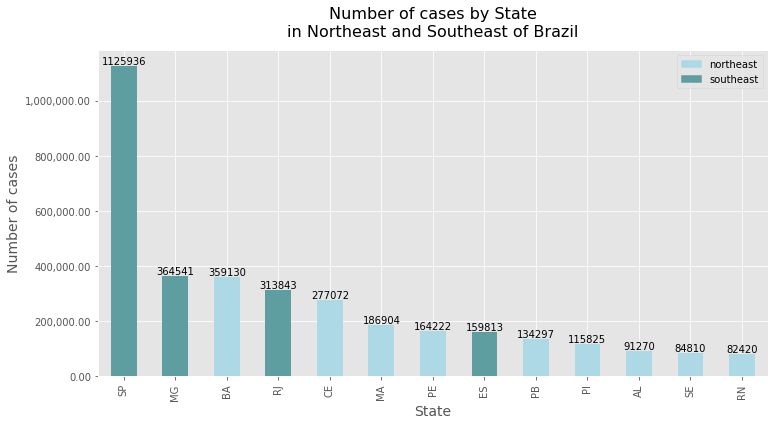

In [65]:
last_registers_state = covid_brazil_states_cleaned \
                            [covid_brazil_states_cleaned.is_last] \
                            .sort_values('confirmed', ascending=False)

colors = ['lightblue' if (region == 'northeast') else 'cadetblue' 
          for region in last_registers_state.region]

ax = last_registers_state \
        .plot(kind='bar', figsize=(12,6), 
              x='state', y='confirmed', 
              color=colors)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

rects = ax.patches
values = last_registers_state['confirmed']

for rect, values in zip(rects, values):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, values,
            ha='center', va='bottom')


plt.title('Number of cases by State\n'+
          'in Northeast and Southeast of Brazil',
          size=16, y=1.026)

plt.xlabel('State', size=14)
plt.ylabel('Number of cases', size=14)

colors_dict = {'northeast':'lightblue', 'southeast':'cadetblue'}         
labels = list(colors_dict.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors_dict[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

<div id="demobox" style="background-color: #ffcccc ; padding: 10px;">
    <b>H1. The state with the highest cumulative number of cases is São Paulo.</b>
</div>
<div id="demobox" style="background-color: #cfc ; padding: 10px;">
    As Number of cases by State graph shows, <b>São Paulo is the state with the highest cumulative number of cases</b>, when compared to states from Northeast and Southeast regions. <br>
    São Paulo has more than twice the number of confirmed cases compared to the second state with the highest number of cases.
</div>

### H2. The second state with the highest cumulative number of cases is Rio de Janeiro.

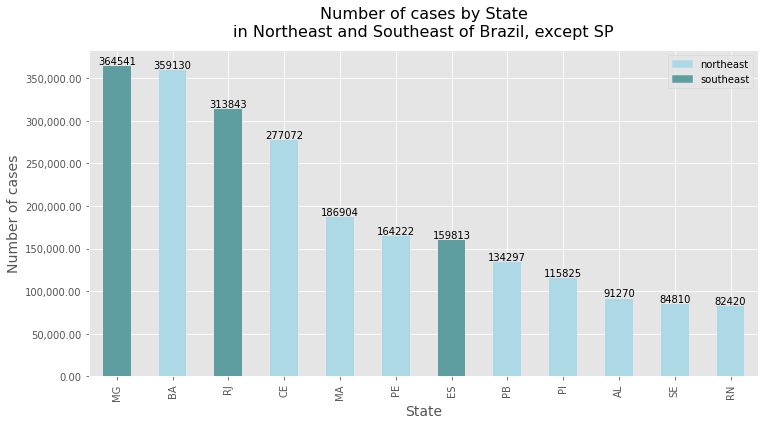

In [66]:
colors_1 = ['lightblue' if (region == 'northeast') else 'cadetblue' 
            for region in last_registers_state.region[1:]]

ax = last_registers_state[1:] \
        .plot(kind='bar', figsize=(12,6), 
              x='state', y='confirmed', 
              color=colors_1)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

rects = ax.patches
values = last_registers_state[1:]['confirmed']

for rect, values in zip(rects, values):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, values,
            ha='center', va='bottom')
    
plt.title('Number of cases by State\n'+
          'in Northeast and Southeast of Brazil, except SP',
          size=16, y=1.026)

plt.xlabel('State', size=14)
plt.ylabel('Number of cases', size=14)

plt.legend(handles, labels)

plt.show()

<div id="demobox" style="background-color: #ffcccc ; padding: 10px;">
    <b>H2. The second state with the highest cumulative number of cases is Rio de Janeiro.</b>
</div>
<div id="demobox" style="background-color: #cfc ; padding: 10px;">
    <b>Rio de Janeiro is the fourth state with the highest cummulative number of cases</b>, when compared to states from Northeast and Southeast regions. <br>
    The second state with the highest cumulative number of cases is Minas Gerais, with a small difference with the third state which is Bahia.
</div>

### H3. Rio de Janeiro is the capital with the highest confirmed cases per 100k inhabitants.

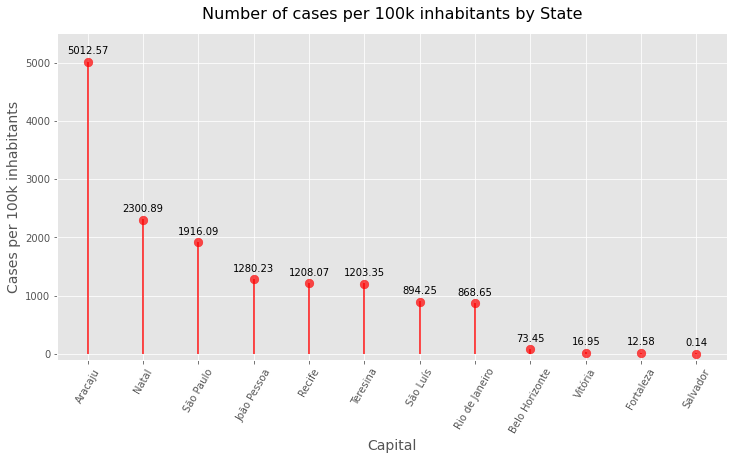

In [67]:
last_registers_city = covid_brazil_capitals_cleaned \
                            [covid_brazil_states_cleaned.is_last] \
                            .sort_values('confirmed_per_100k_inhabitants', 
                                         ascending=False) \
                            .reset_index(drop=True)

x=last_registers_city['city']
y=last_registers_city['confirmed_per_100k_inhabitants']

fig, ax = plt.subplots(figsize=(12,6))

ax.vlines(x=x, ymin=0, ymax=y+5, 
          color='red', alpha=0.7, linewidth=2)

ax.scatter(x=x, y=y, s=75, 
           color='red', alpha=0.7)

plt.title('Number of cases per 100k inhabitants by State',
          size=16, y=1.026)

plt.xlabel('Capital', size=14)
plt.xticks(rotation=60)
plt.ylabel('Cases per 100k inhabitants', size=14)
plt.ylim(-100,5500)

# Annotate
for row in last_registers_city.itertuples():
    ax.text(row.Index, row.confirmed_per_100k_inhabitants+100,
            s=round(row.confirmed_per_100k_inhabitants, 2), 
            horizontalalignment= 'center', 
            verticalalignment='bottom')


plt.show()

<div id="demobox" style="background-color: #ffcccc ; padding: 10px;">
    <b>H3. Rio de Janeiro is the capital with the highest confirmed cases per 100k inhabitants.</b>
</div>
<div id="demobox" style="background-color: #cfc ; padding: 10px;">
    Rio de Janeiro is the eighth capital with the highest cummulative number of cases, when compared to states of Northeast and Southeast. <br>
    <b>The first capital with the highest confirmed cases per 100k inhabitants is Aracaju.</b>
</div>

### H4. São Paulo capital always led the highest number of cases per day in Southeast.

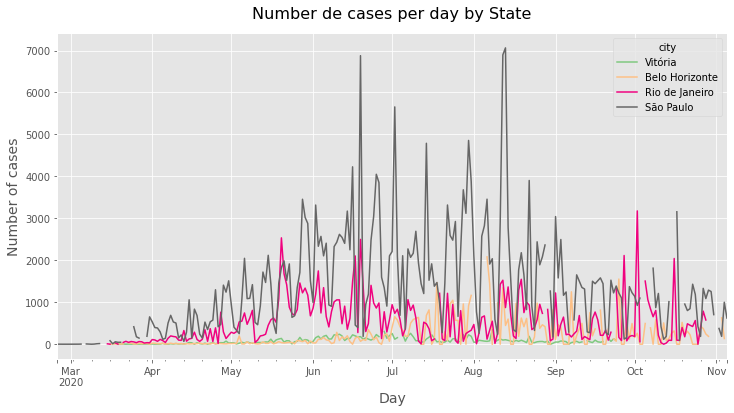

In [68]:
covid_brazil_capitals_cleaned_pivot = \
        covid_brazil_capitals_cleaned.pivot(index='date',
                                            columns='city',
                                            values='case_by_day')

covid_brazil_capitals_cleaned_pivot_se = covid_brazil_capitals_cleaned_pivot[southeast_capitals]


covid_brazil_capitals_cleaned_pivot_se.plot(figsize=(12,6), colormap="Accent")

plt.title('Number de cases per day by State',size=16, y=1.026)
plt.xlabel('Day', size=14)
plt.ylabel('Number of cases', size=14)

plt.show()

<div id="demobox" style="background-color: #ffcccc ; padding: 10px;">
    <b>H4. São Paulo capital always led the highest number of cases per day in Southeast.</b>
</div>
<div id="demobox" style="background-color: #cfc ; padding: 10px;">
Most of the time São Paulo capital led the highest number of cases per day in Southeast. <br>
    However <b>in some days, Rio de Janeiro and Belo Horizonte made this number higher.</b>
</div>

### H5. Fortaleza was the first capital to have a confirmed case in the Northeast.

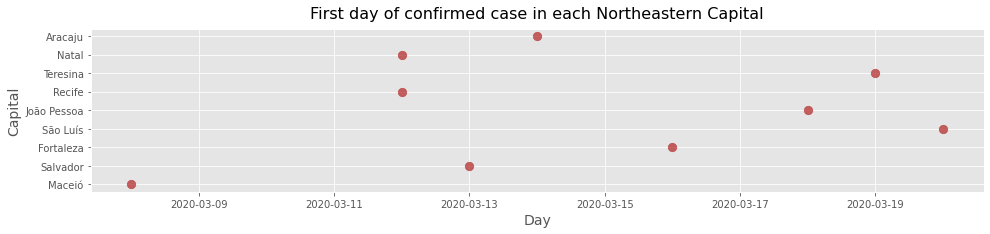

In [69]:
first_case_capital = covid_brazil_capitals_cleaned \
                        [covid_brazil_capitals_cleaned.order_for_place==1]

x=first_case_capital[first_case_capital.region == 'northeast']['date']
y=first_case_capital[first_case_capital.region == 'northeast']['city']

plt.figure(figsize=(16,3))
plt.scatter(y=y, x=x, s=75, color='firebrick', alpha=0.7)

plt.title('First day of confirmed case in each Northeastern Capital',size=16, y=1.026)
plt.xlabel('Day', size=14)
plt.ylabel('Capital', size=14)

plt.show()

<div id="demobox" style="background-color: #ffcccc ; padding: 10px;">
    <b>H5. Fortaleza was the first capital to have a confirmed case in the Northeast.</b>
</div>
<div id="demobox" style="background-color: #cfc ; padding: 10px;">
    <b>Maceió was the first capital to have a confirmed case in the Northeast.</b> <br>
    Fortaleza was the sixth capital to have a confirmed case in the Northeast.
</div>

### H6. Northeast is the region with the highest death rate mean.

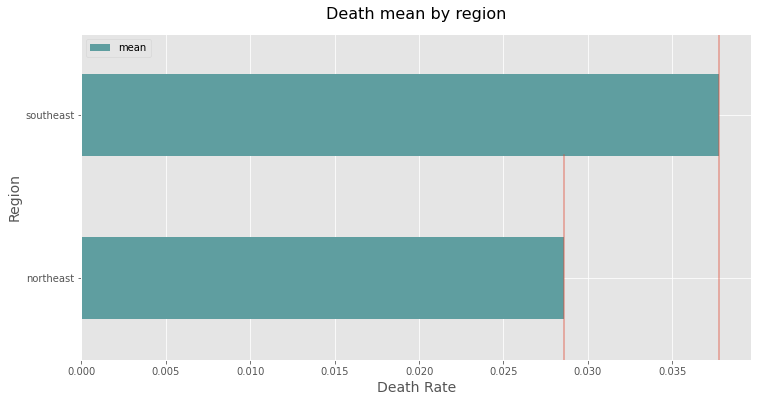

In [70]:
death_rate_state_northeast = \
    covid_brazil_states_cleaned \
        [(covid_brazil_states_cleaned.region == 'northeast') &
         (covid_brazil_states_cleaned.is_last)] \
        ['death_rate'] \
        .mean()
    
death_rate_state_southeast = \
    covid_brazil_states_cleaned \
        [(covid_brazil_states_cleaned.region == 'southeast') &
         (covid_brazil_states_cleaned.is_last)] \
        ['death_rate'] \
        .mean()

death_rate_state = pd.DataFrame([death_rate_state_northeast,
                                 death_rate_state_southeast], 
                                columns=['mean'])

death_rate_state['region'] = pd.Series(['northeast', 'southeast'])

death_rate_state.plot(kind='barh', x='region', y='mean',
                      color='cadetblue', figsize=(12,6))

plt.axvline(x=death_rate_state['mean'][0], ymax=0.628, alpha=0.5)
plt.axvline(x=death_rate_state['mean'][1], alpha=0.5)

plt.title('Death mean by region',size=16, y=1.026)
plt.ylabel('Region', size=14)
plt.xlabel('Death Rate', size=14)

plt.show()

<div id="demobox" style="background-color: #ffcccc ; padding: 10px;">
    <b>H6. Northeast is the region with the highest death rate mean.</b>
</div>
<div id="demobox" style="background-color: #cfc ; padding: 10px;">
    <b>The highest death rate mean is in the Southeast region.</b> <br>
</div>

### H7. Southeast is the region with the highest average accumulated number of confirmed cases per 100k inhabitants.

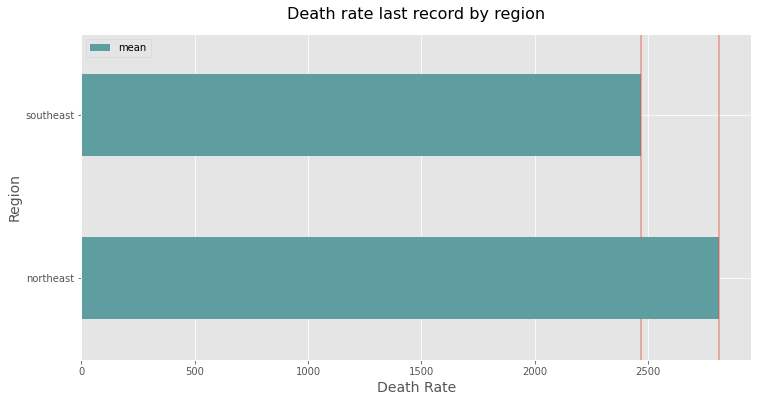

In [71]:
cumulative_confirmed_mean_northeast = \
    covid_brazil_states_cleaned \
        [(covid_brazil_states_cleaned.region == 'northeast') &
         (covid_brazil_states_cleaned.is_last)] \
        ['confirmed_per_100k_inhabitants'] \
        .mean()

cumulative_confirmed_mean_southeast = \
    covid_brazil_states_cleaned \
        [(covid_brazil_states_cleaned.region == 'southeast') &
         (covid_brazil_states_cleaned.is_last)] \
        ['confirmed_per_100k_inhabitants'] \
        .mean()

cumulative_confirmed_state_mean = \
    pd.DataFrame([cumulative_confirmed_mean_northeast,
                  cumulative_confirmed_mean_southeast], 
                 columns=['mean'])

cumulative_confirmed_state_mean['region'] = pd.Series(['northeast', 'southeast'])

cumulative_confirmed_state_mean.plot(kind='barh', x='region', y='mean',
                                color='cadetblue', figsize=(12,6))

plt.axvline(x=cumulative_confirmed_state_mean['mean'][0], alpha=0.5)
plt.axvline(x=cumulative_confirmed_state_mean['mean'][1], ymin=0.378, alpha=0.5)
plt.axvline(x=cumulative_confirmed_state_mean['mean'][1], ymax=0.126, alpha=0.5)

plt.title('Death rate last record by region',size=16, y=1.026)
plt.ylabel('Region', size=14)
plt.xlabel('Death Rate', size=14)

plt.show()

<div id="demobox" style="background-color: #ffcccc ; padding: 10px;">
    <b>H7. Southeast is the region with the highest average accumulated number of confirmed cases per 100k inhabitants.</b>
</div>
<div id="demobox" style="background-color: #cfc ; padding: 10px;">
    <b>Northeast</b> is the region with the highest average accumulated number of confirmed cases per 100k inhabitants.
</div>

### H8. The period of higher number of cases in the southeast was in March, and in the northeast in April.

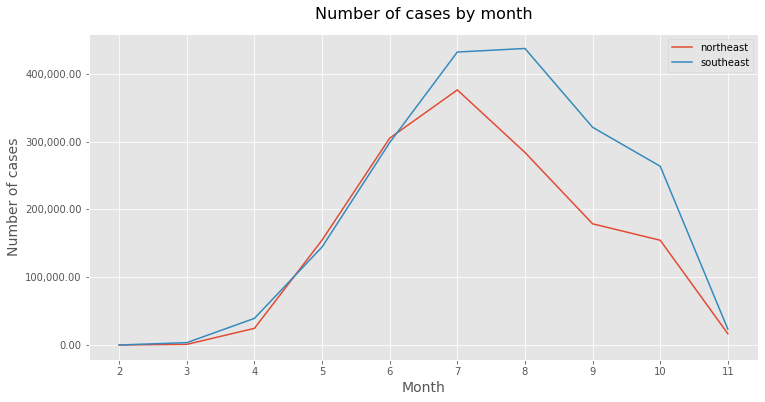

In [72]:
cumulative_case_sum_month_northeast = \
    covid_brazil_states_cleaned \
        [covid_brazil_states_cleaned.region == 'northeast'] \
        .groupby(covid_brazil_states_cleaned.date.dt.month) \
        .sum('cases_by_day') \
        [['case_by_day']] \

cumulative_case_sum_month_southeast = \
    covid_brazil_states_cleaned \
        [covid_brazil_states_cleaned.region == 'southeast'] \
        .groupby(covid_brazil_states_cleaned.date.dt.month) \
        .sum('cases_by_day') \
        [['case_by_day']]

cumulative_case_sum_month = \
    cumulative_case_sum_month_northeast \
        .merge(cumulative_case_sum_month_southeast,
               how='outer', on='date') \
        .rename(columns={'case_by_day_x':'northeast',
                         'case_by_day_y':'southeast'}) \
        .fillna(0) \
        .astype(int) \
        .sort_values(by='date')


ax = cumulative_case_sum_month.plot(figsize=(12,6))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(range(2,12))
plt.title('Number of cases by month',size=16, y=1.026)
plt.ylabel('Number of cases', size=14)
plt.xlabel('Month', size=14)

plt.show()

<div id="demobox" style="background-color: #ffcccc ; padding: 10px;">
    <b>H8. The period of higher number of cases in the southeast was in March, and in the northeast in April.</b>
</div>
<div id="demobox" style="background-color: #cfc ; padding: 10px;">
    In <b>Southeast the period of the highest number of cases was in August</b>. On the other hand, <b>the period of the highest number of cases in Northeast was in July</b>.
</div>